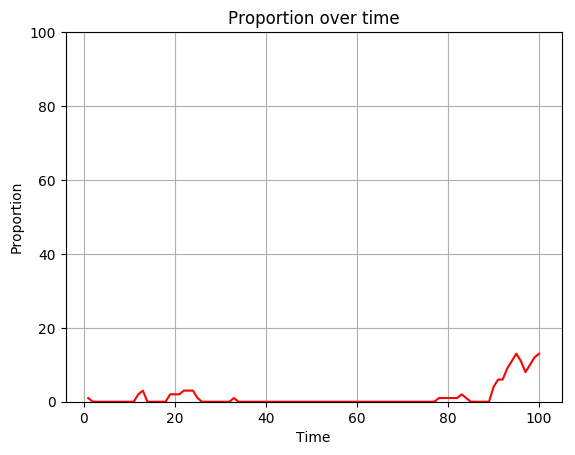

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f617b119c88>

In [25]:
using PyPlot

function nextGeneration(populationSize, proportion)
    """Returns the proportion of the new generation, 
    using the old generation."""
    newProportion = 0
    for i in 1:populationSize
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() < proportion/populationSize
            newProportion += 1
        end
    end
    return newProportion
end


function mutations(populationSize, proportion, probability0to1, probability1to0)
    """Applying the mutations for a generation given proportion.
    probability0to1 is a fixed (float) number between 0 and 1 that represented the transition probability from 0 to 1.
    probability1to0 is a fixed (float) number between 0 and 1 that represented the transition probability from 1 to 0."""
    
    newProportion = proportion
    for j in 1:(populationSize-proportion)
        if rand() <= probability0to1
            newProportion += 1
        end
    end    

    for j in 1:proportion
        if rand() <= probability1to0
            newProportion -= 1
        end
    end

    return newProportion
end

function nextGenerationMutations(populationSize, proportion, probability0to1, probability1to0)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying mutations given by the two 
    transition probabilities probability0to1 and probability1to0."""
    
    # Applying the mutations
    proportionAfterMutations = mutations(populationSize, proportion, probability0to1, probability1to0) 
    
    # Producing the next generation
    return nextGeneration!(populationSize, proportionAfterMutations)
end

function trajectoryMutations(populationSize, initialProportion, probability0to1, 
        probability1to0, finalTime)
    """Run the Wright-Fisher algorithm with mutations. Returns the list of proportions over time (for now).
    finalTime is how many iterations you do."""
    
    listOfProportions = zeros(Float64, populationSize)
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to trajectory
    listOfProportions[1] = currentProportion

    for time in 2:finalTime
        
        currentProportion = nextGenerationMutations(populationSize, currentProportion,
        probability0to1, probability1to0)
        
        # Adding the proportion to the plot
        listOfProportions[time] = currentProportion
    end
    
    # Returns the entire trajectory
    return listOfProportions
end

function plotTrajectory(populationSize, trajectory)
    """Plot a trajectory. populationSize is an argument so that we can fix the zoom."""
    ioff()
    
    listOfTimes = collect(1:length(trajectory))
    
    title("Proportion over time")
    xlabel("Time")
    ylabel("Proportion")
    ylim(0, populationSize)
    grid(true)
    
    plot(listOfTimes, trajectory, color="red")
end

#########################################################################################
# Plot of a trajectory
#########################################################################################
plotTrajectory(100, trajectoryMutations(100, 1, 0.001, 0.0001, 100))